## Yelp Business Features Data Exploration
Parse through 'yelp_academic_dataset_business.json' and check to see which location/cuisine combination has more restaurants.

References : https://www.kaggle.com/sudhirnl7/basic-exploration-of-business-review-at-yelp-com

### Import Necessary Packages & Modules

In [1]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import json
import requests

# from mpl_toolkits.basemap import Basemap

from pandas.io.json import json_normalize
# from wordcloud import WordCloud
# import squarify
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re 

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.use('bmh')

### Load Data for Available Yelp Businesses

In [2]:
businesses = []
with open('datasets/yelp_academic_dataset_business.json', encoding='utf8') as f: ## download JSON file from https://www.kaggle.com/yelp-dataset/yelp-dataset
    for line in f:
        businesses.append(json.loads(line))
        
df = json_normalize(businesses)
df.columns = df.columns.map(lambda x: x.split(".")[-1])

df.head()

,address,attributes,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,...,Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,...,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,...,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8:0-17:0,1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


### Wordcloud to Visualise Top Wordes by Business

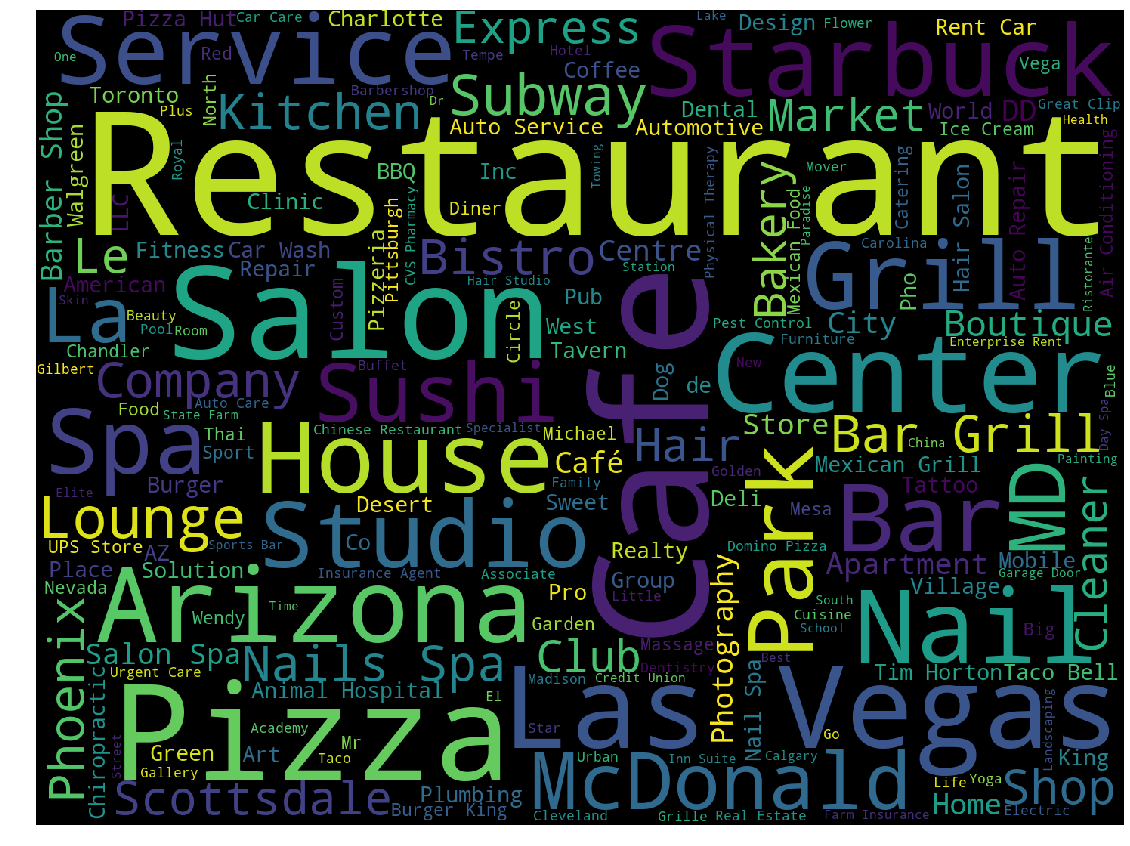

In [3]:
business = df

cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(business['name'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

Restaurant type business looks to have largest category in this Yelp Dataset.

### Visualise Top Cities in Yelp Dataset

Number of cities available = 1111


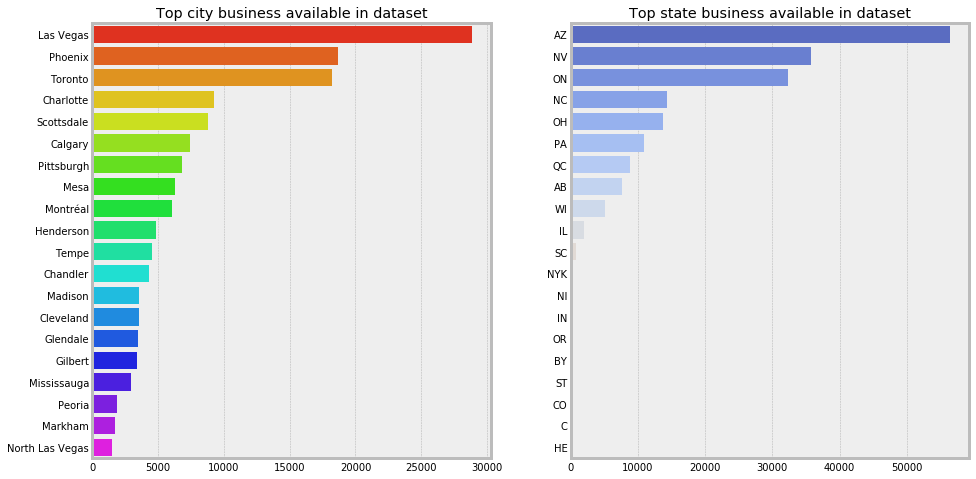

In [4]:
business = df

print('Number of cities available =',business['city'].nunique())
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = business['city'].value_counts()[:20].to_frame()

sns.barplot(cnt['city'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top city business available in dataset')

cnt = business['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top state business available in dataset');

### Visualise Top Cities On Restaurant Catagory in Yelp Dataset

Number of city listed 774


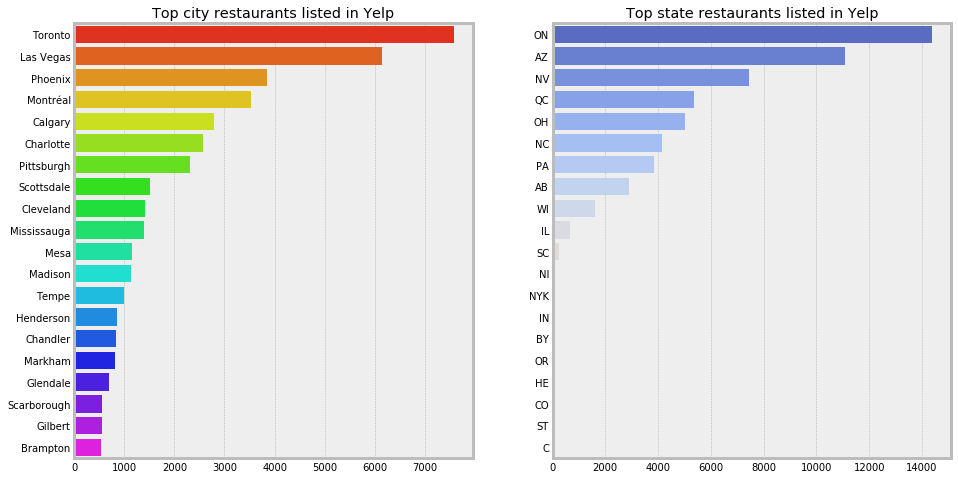

In [5]:
all_restaurants = df[df['categories'].str.contains("Restaurant") == True]

print('Number of city listed',all_restaurants['city'].nunique())
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = all_restaurants['city'].value_counts()[:20].to_frame()

sns.barplot(cnt['city'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top city restaurants listed in Yelp')

cnt = all_restaurants['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top state restaurants listed in Yelp');

Looking at top cities, for our MVP, we shall choose 3 cities namely Toronto, Las Vegas and Calgary.

### Filter out Restaurants in the 3 selected cities and categorise by Cuisine type

In [50]:
# Filter restaurant and cities
restaurants = df[df['categories'].str.contains("Restaurant") == True]
cities = ['Toronto','Las Vegas','Calgary']
odyssey_restaurants = restaurants[restaurants.city.isin(cities)]


# Add Cuisine column according to categories

o_italian = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Italian") == True]
o_pizza = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Pizza") == True]
o_chinese = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Chinese") == True]
o_indian = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Indian") == True]
o_steakhouses = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Steakhouses") == True]
o_japanese = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Japanese") == True]
o_mexican = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Mexican") == True]
o_american_new = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("American \(New\)") == True]
o_greek = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Greek") == True]
o_thai = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Thai") == True]
o_fast_food = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Fast Food") == True]
o_american_trad = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("American \(Traditional\)") == True]
o_bakeries = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Bakeries") == True]
o_canadian_new = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Canadian \(New\)") == True]
o_sandwiches = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Sandiwiches") == True]
o_asian_fusion = odyssey_restaurants[odyssey_restaurants['categories'].str.contains("Asian Fusion") == True]

o_italian['cuisine'] = str("italian")
o_pizza['cuisine'] = str("pizza")
o_chinese['cuisine'] = str("chinese")
o_indian['cuisine'] = str("indian")
o_steakhouses['cuisine'] = str("steakhouses")
o_japanese['cuisine'] = str("japanese")
o_mexican['cuisine'] = str("mexican")
o_american_new['cuisine'] = str("american")
o_greek['cuisine'] = str("greek")
o_thai['cuisine'] = str("thai")
o_fast_food['cuisine'] = str("fast_food")
o_american_trad['cuisine'] = str("american")
o_bakeries['cuisine'] = str("bakeries")
o_canadian_new['cuisine'] = str("canadian")
o_sandwiches['cuisine'] = str("sandwiches")
o_asian_fusion['cuisine'] = str("asian_fusion")

odyssey_restaurants = o_italian.append([o_pizza, o_chinese,o_indian,o_steakhouses,o_japanese,o_mexican,o_american_new,
                                  o_greek,o_thai,o_fast_food,o_american_trad,o_bakeries,o_canadian_new,o_sandwiches,
                                  o_asian_fusion])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

### Compare Cuisine Rank on the 3 Cities

Text(0.5,1,'Cuisine Ranked for Calgary')

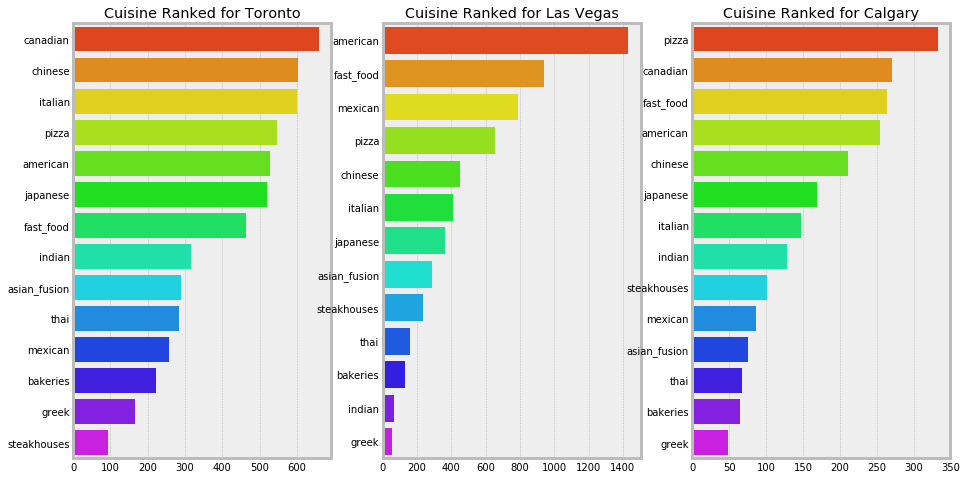

In [38]:
f,ax = plt.subplots(1,3, figsize=(14,8))
ax1,ax2,ax3  = ax.flatten()
cnt = odyssey_restaurants[odyssey_restaurants['city'] == 'Toronto']['cuisine'].value_counts()[:20].to_frame()

sns.barplot(cnt['cuisine'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Cuisine Ranked for Toronto')


cnt = odyssey_restaurants[odyssey_restaurants['city'] == 'Las Vegas']['cuisine'].value_counts()[:20].to_frame()

sns.barplot(cnt['cuisine'], cnt.index, palette = 'gist_rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Cuisine Ranked for Las Vegas')

cnt = odyssey_restaurants[odyssey_restaurants['city'] == 'Calgary']['cuisine'].value_counts()[:20].to_frame()

sns.barplot(cnt['cuisine'], cnt.index, palette = 'gist_rainbow', ax =ax3)
ax3.set_xlabel('')
ax3.set_title('Cuisine Ranked for Calgary')

For MVP purposes, we choose 3 cuisines that are available in all 3 cities. The selected ones are Chinese, American & Italian.

In [51]:
cuisine = ['american','chinese','italian']
odyssey_restaurants = odyssey_restaurants[odyssey_restaurants.cuisine.isin(cuisine)]

In [52]:
odyssey_restaurants.head()

,address,attributes,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,...,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,cuisine
33,2227 N Rampart Blvd,NaN,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,...,1,36.201990,-115.283122,Omelet House Summerlin,Summerlin,89128,242,4.0,NV,italian
232,972 College Street W,NaN,NaN,NaN,full_bar,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,NaN,...,1,43.653501,-79.427609,Giulietta,Dufferin Grove,M6H 1A5,12,4.5,ON,italian
254,628 8th Avenue SW,NaN,NaN,NaN,full_bar,NaN,NaN,NaN,NaN,NaN,...,1,51.046083,-114.075412,Chef's Cafe,,T2P 1G4,3,4.5,AB,italian
909,185 Dundas Street W,NaN,NaN,NaN,none,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,...,0,43.654995,-79.386676,Eat Fresh Be Healthy,Downtown Core,M5G 1C7,172,4.0,ON,italian
1052,27 Yorkville Avenue,NaN,NaN,NaN,full_bar,"{'romantic': False, 'intimate': True, 'classy'...",NaN,NaN,NaN,NaN,...,0,43.671551,-79.388874,Mideastro Yorkville,Yorkville,M4W 1L4,28,3.5,ON,italian


### Visualising Distribution of Ratings for Filtered Restaurants

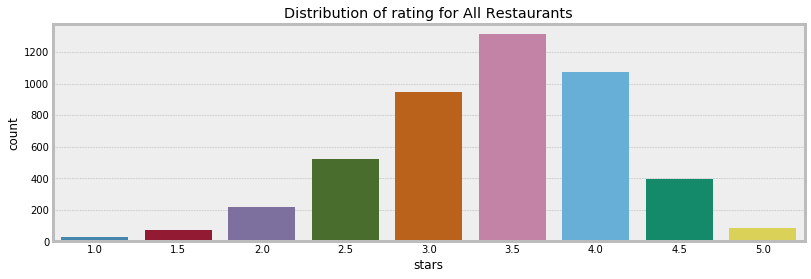

In [55]:
plt.figure(figsize=(12,4))
ax = sns.countplot(odyssey_restaurants['stars'])
plt.title('Distribution of rating for All Restaurants');

Most Yelpers give ratins between 3.5 to 4.0 for the 3 cuisines Restaurants in all 3 cities

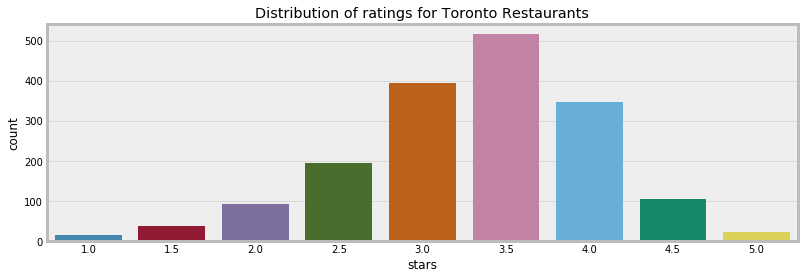

In [62]:
plt.figure(figsize=(12,4))
ax = sns.countplot(odyssey_restaurants[odyssey_restaurants['city'] == 'Toronto']['stars'])
plt.title('Distribution of ratings for Toronto Restaurants');

Most Yelpers give ratins between 3.0 to 3.5 for the 3 cuisines Restaurants in Toronto

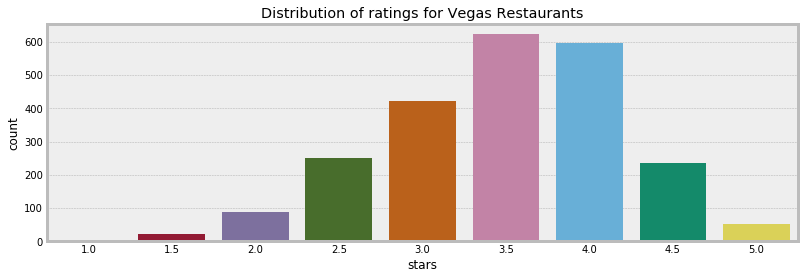

In [63]:
plt.figure(figsize=(12,4))
ax = sns.countplot(odyssey_restaurants[odyssey_restaurants['city'] == 'Las Vegas']['stars'])
plt.title('Distribution of ratings for Vegas Restaurants');

Most Yelpers give ratins between 3.5 to 4.0 for the 3 cuisines Restaurants in Las Vegas

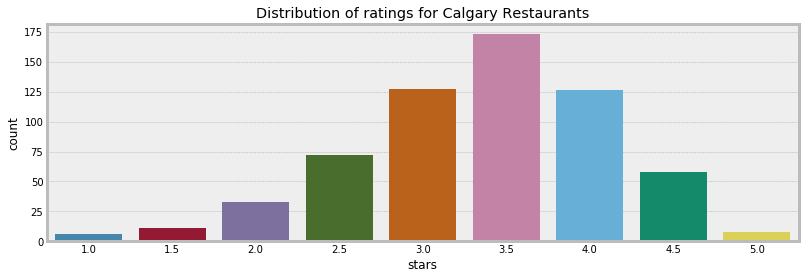

In [64]:
plt.figure(figsize=(12,4))
ax = sns.countplot(odyssey_restaurants[odyssey_restaurants['city'] == 'Calgary']['stars'])
plt.title('Distribution of ratings for Calgary Restaurants');

Most Yelpers give ratins between 3.0 to 4.0 for the 3 cuisines Restaurants in Calgary

### Write Output

In [65]:
## Write final output to CSV

odyssey_restaurants.to_csv('odyssey_restaurants.csv')